Метод Пауэлла: x[0] =  4.249999999805711  x[1] =   -2.2000000000610624 
  func(x1, x2) =  1.2974999999999959 
  Количество итераций:  1.0


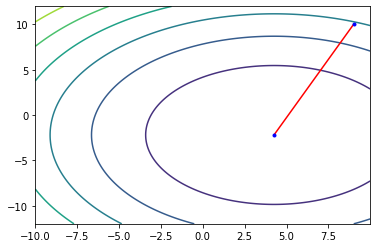

In [7]:
import math as m
import numpy as np
import pylab
import matplotlib.pyplot as plt


xt = np.zeros(200)
yt = np.zeros(200)

def f(x, num):
    
    if(num == 0):
        x1 = x
        x2 = 10
    
    if(num == 1):
        x1 = 9
        x2 = x

    
    f = ((pow(x1,2)) - 8.5*x1 + (pow(x2,2)) + 4.4*x2 + 24.2)

    return f


def Func(x,y):
    return (x*x - 8.5*x + y*y + 4.4*y + 24.2)



def g(x):
    f = ((pow(x[0],2)) - 8.5*x[0] + (pow(x[1],2)) + 4.4*x[1] + 24.2)
    return f

def makeData():
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-12, 12, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
 
    zgrid = xgrid**2 - 8.5*xgrid +ygrid**2 + 4.4*ygrid + 24.2
    
    return xgrid, ygrid, zgrid

def paul(x1, Dx, n):
    global xt
    pt = np.zeros(200)
    pt[199] = 0
    iter = 0
    e1 = 0.1
    e2 = 0.1
    x2 = x1 + Dx
    fx1 = f(x1, n)
    fx2 = f(x2, n)
    if (fx1 > fx2):
        x3 = x1 + 2*Dx
    else:
        x3 = x1 - Dx

    while(True):
        fx3 = f(x3, n)
        if(fx1 < fx2 and fx1 < fx3):
            fmin = fx1
            xmin = x1
        if(fx2 < fx1 and fx2 < fx3):
            fmin = fx2
            xmin = x2
        if(fx3 < fx1 and fx3 < fx2):
            fmin = fx3
            xmin = x3

        num = (pow(x2, 2)-pow(x3, 2))*fx1+(pow(x3, 2)-pow(x1, 2))*fx2+(pow(x1, 2)-pow(x2, 2))*fx3
        denum = (x2-x3)*fx1+(x3-x1)*fx2+(x1-x2)*fx3;
        x = 0.5*(num/denum)

        pt[iter] = x
        if(n == 0):
            xt = pt
            
        if (pt[199] < iter):
                pt[199] = iter

        if(abs(xmin-x) < e1 and abs(fmin-f(x, n)) < e2):
            return x
        else:
            iter += 1
            if(x < xmin):
                xmin = x
                x1 = xmin
                x2 = x1 + Dx
                fx1 = f(x1, n)
                fx2 = f(x2, n)
                if (fx1 > fx2):
                    x3 = x1 + 2*Dx
                else:
                    x3 = x1 - Dx
                
            else:
                x1 = xmin
                x2 = x1 + Dx
                fx1 = f(x1, n)
                fx2 = f(x2, n)
                if (fx1 > fx2):
                    x3 = x1 + 2*Dx
                else: 
                    x3 = x1 - Dx
        
                
            
        
    
    return x

fout = list()
x = np.zeros(2)
x[0] = 9
x[1] = 10
fout.append([x[0],x[1],Func(x[0],x[1])])

for i in range(2):
    x[i] = paul(x[i], 0.01, i)
fout.append([x[0],x[1],Func(x[0],x[1])])
print("Метод Пауэлла: x[0] = " , x[0] , " x[1] =  " , x[1] ,'\n', " func(x1, x2) = " , g(x) ,'\n', " Количество итераций: " , xt[199])

x, y, z = makeData()
pylab.contour(x, y, z)
data = np.array(fout)
plt.plot(data[:,0], data[:,1], 'r')
plt.plot(data[:,0], data[:,1], 'b.')
pylab.show()        



